In [21]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [22]:
df=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
#checking missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
#checking the data type
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [25]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [26]:
#Scaler the data
y=df['quality']
x=df.drop('quality',axis=1)

In [27]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [28]:
#scaling
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [29]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [33]:
#Clustering 
kmeans=KMeans(n_clusters=6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [34]:
clusters=kmeans.predict(x)
clusters

array([0, 0, 0, ..., 5, 5, 2], dtype=int32)

In [35]:
#Reducing feature to 2 with PCA
pca=PCA(n_components=2)
reduced_x=pd.DataFrame(pca.fit_transform(x),columns=['PC1','PC2'])
reduced_x

,PC1,PC2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [39]:
reduced_x['cluster']=clusters
reduced_x

,PC1,PC2,cluster
0,-1.619530,0.450950,0
1,-0.799170,1.856553,0
2,-0.748479,0.882039,0
3,2.357673,-0.269976,1
4,-1.619530,0.450950,0
...,...,...,...
1594,-2.150500,0.814286,5
1595,-2.214496,0.893101,5
1596,-1.456129,0.311746,5
1597,-2.270518,0.979791,5


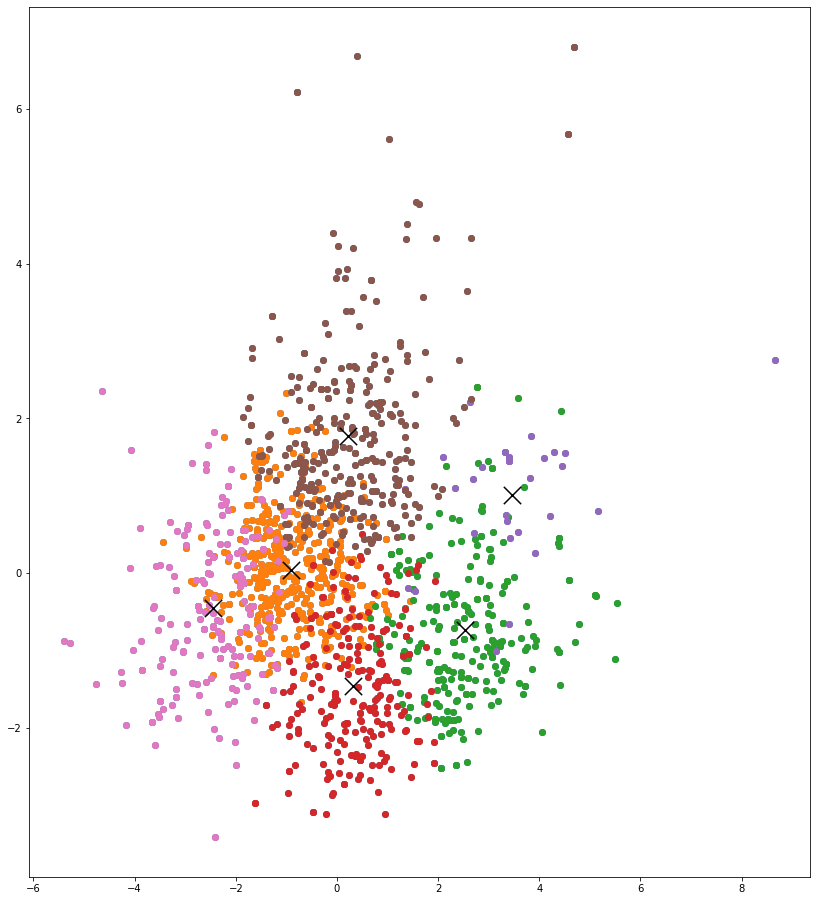

In [45]:
plt.figure(figsize=(14,16))
plt.scatter(reduced_x['PC1'],reduced_x['PC2'])

plt.scatter(reduced_x[reduced_x['cluster']==0].loc[:,'PC1'],reduced_x[reduced_x['cluster']==0].loc[:,'PC2'])
plt.scatter(reduced_x[reduced_x['cluster']==1].loc[:,'PC1'],reduced_x[reduced_x['cluster']==1].loc[:,'PC2'])
plt.scatter(reduced_x[reduced_x['cluster']==2].loc[:,'PC1'],reduced_x[reduced_x['cluster']==2].loc[:,'PC2'])
plt.scatter(reduced_x[reduced_x['cluster']==3].loc[:,'PC1'],reduced_x[reduced_x['cluster']==3].loc[:,'PC2'])
plt.scatter(reduced_x[reduced_x['cluster']==4].loc[:,'PC1'],reduced_x[reduced_x['cluster']==4].loc[:,'PC2'])
plt.scatter(reduced_x[reduced_x['cluster']==5].loc[:,'PC1'],reduced_x[reduced_x['cluster']==5].loc[:,'PC2'])
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300)



plt.show()

In [37]:
#finding cluster centers
reduced_centers=pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[-0.91024209,  0.04308162],
       [ 2.52422957, -0.74253649],
       [ 0.32545048, -1.46180476],
       [ 3.45573535,  1.01303151],
       [ 0.225186  ,  1.76906505],
       [-2.44161651, -0.45030096]])

In [46]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [49]:

model=MLPClassifier(hidden_layer_sizes=(256,256),max_iter=500)
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

In [50]:
print(f'Model_Accurary:{model.score(x_test,y_test)}')

Model_Accurary:0.6291666666666667
